In [47]:
import pandas as pd

df=pd.read_csv('d:/data/steam/steam_final.csv')
df.head()

,days_after_releasing,english,required_age,achievements,average_playtime,median_playtime,owners,price,positive_ratings,negative_ratings,...,Action,Casual,Adventure,Strategy,Simulation,Early Access,RPG,Free to Play,Puzzle,p-n ratio
0,6769,1,0,0,17612,317,15000000,7.19,124534,3339,...,1,0,0,0,0,0,0,0,0,37.296795
1,7349,1,0,0,277,62,7500000,3.99,3318,633,...,1,0,0,0,0,0,0,0,0,5.241706
2,5858,1,0,0,187,34,7500000,3.99,3416,398,...,0,0,0,0,0,0,0,0,0,8.582915
3,6557,1,0,0,258,184,7500000,3.99,1273,267,...,1,0,0,0,0,0,0,0,0,4.767790
4,7135,1,0,0,624,415,7500000,3.99,5250,288,...,1,0,0,0,0,0,0,0,0,18.229167


In [48]:
import numpy as np
from matplotlib import font_manager,rc

font_name=font_manager.FontProperties(fname='c:/windows/fonts/malgun.ttf').get_name()
rc('font', family=font_name)

df['p-n ratio_categorize']=np.digitize(df['p-n ratio'], [0,4,8])
df.head()

,days_after_releasing,english,required_age,achievements,average_playtime,median_playtime,owners,price,positive_ratings,negative_ratings,...,Casual,Adventure,Strategy,Simulation,Early Access,RPG,Free to Play,Puzzle,p-n ratio,p-n ratio_categorize
0,6769,1,0,0,17612,317,15000000,7.19,124534,3339,...,0,0,0,0,0,0,0,0,37.296795,3
1,7349,1,0,0,277,62,7500000,3.99,3318,633,...,0,0,0,0,0,0,0,0,5.241706,2
2,5858,1,0,0,187,34,7500000,3.99,3416,398,...,0,0,0,0,0,0,0,0,8.582915,3
3,6557,1,0,0,258,184,7500000,3.99,1273,267,...,0,0,0,0,0,0,0,0,4.767790,2
4,7135,1,0,0,624,415,7500000,3.99,5250,288,...,0,0,0,0,0,0,0,0,18.229167,3


D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (1: 나쁨, 2: 보통, 3: 좋음)')

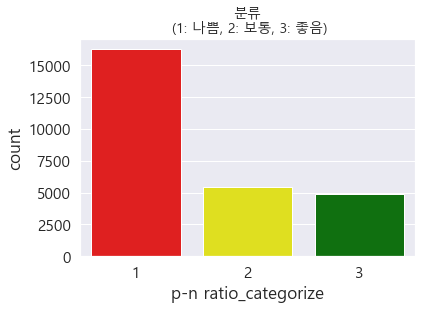

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

colors=['red','yellow','green']
sns.countplot('p-n ratio_categorize', data=df, palette=colors)
plt.title("분류\n (1: 나쁨, 2: 보통, 3: 좋음)", fontsize=14)

In [50]:
from imblearn.under_sampling import RandomUnderSampler

X=df[df.columns[:-2]]
y=df['p-n ratio_categorize']

X_sample, y_sample=RandomUnderSampler(random_state=0).fit_resample(X,y)
X_samp=pd.DataFrame(data=X_sample, columns=df.columns[:-2])
y_samp=pd.DataFrame(data=y_sample, columns=['p-n ratio_categorize'])
df2=pd.concat([X_samp,y_samp], axis=1)

In [51]:
df2['p-n ratio_categorize'].value_counts()

1    4876
2    4876
3    4876
Name: p-n ratio_categorize, dtype: int64

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (1: 나쁨, 2: 보통, 3: 좋음)')

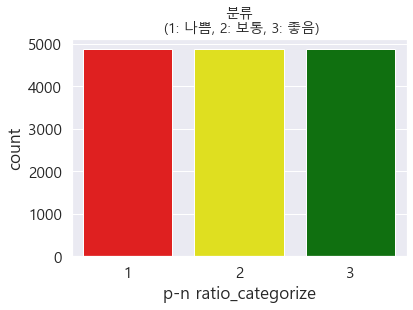

In [52]:
sns.countplot('p-n ratio_categorize', data=df2, palette=colors)
plt.title("분류\n (1: 나쁨, 2: 보통, 3: 좋음)", fontsize=14)

In [53]:
X=df2[df2.columns[:-1]]
y=df2['p-n ratio_categorize']

In [54]:
df2.isnull().values.any()

False

In [55]:
df.isnull().values.any()

False

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=0)
model=LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=5000)

In [57]:
print('학습용 :',model.score(X_train, y_train))
print('검증용 :',model.score(X_test, y_test))

학습용 : 0.8920697316698001
검증용 : 0.8776486671223513


In [58]:
from sklearn.metrics import confusion_matrix

pred=model.predict(X_test)
cm=confusion_matrix(y_test, pred)
cm

array([[843,  69,  26],
       [ 22, 834, 147],
       [  0,  94, 891]], dtype=int64)

<AxesSubplot:title={'center':'Confusion Matrix'}>

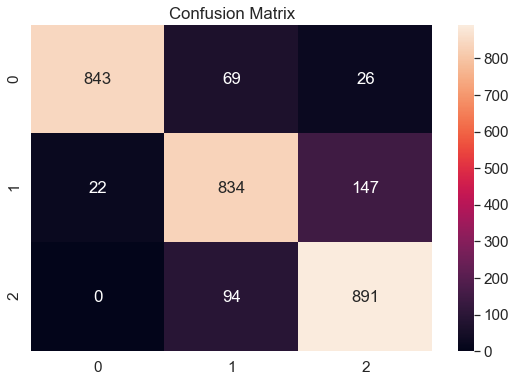

In [59]:
sns.set(font_scale=1.4)
plt.figure(figsize=(9,6))
plt.title('Confusion Matrix')
sns.heatmap(cm, annot=True, fmt='d')

In [60]:
coef=pd.DataFrame(model.coef_[2],X.columns,columns=['coef']).sort_values(by='coef', ascending=False)
coef

,coef
positive_ratings,0.497221
Steam Trading Cards_cate,0.015206
average_playtime,0.002363
Puzzle,0.001635
Free to Play,0.001439
Steam Cloud_cate,0.000947
days_after_releasing,0.000301
achievements,0.000140
owners,-0.000005
median_playtime,-0.001966


In [61]:
model.coef_

array([[-3.29022628e-04,  3.53630869e-02,  5.30414586e-03,
        -2.10599054e-04, -3.20939328e-03,  2.00892262e-03,
         3.82206951e-06,  6.73478493e-02, -5.48425617e-01,
         2.77299412e+00, -5.87968990e-03, -5.28347005e-03,
         3.54984595e-02,  3.33618596e-02, -1.16187551e-02,
        -1.09496780e-02, -7.24438440e-03, -6.02594420e-03,
         6.67255146e-03,  1.92682074e-04, -3.93139529e-03,
        -3.77525643e-04,  2.34832248e-03,  2.15030288e-02,
         1.74802792e-02,  2.47790528e-02,  1.35298992e-02,
         3.89196203e-03, -1.78422481e-03,  9.96995313e-03,
         3.16721351e-03, -1.53728512e-03, -1.30848800e-03],
       [ 2.84547119e-05,  5.32610195e-02,  1.11640572e-03,
         7.08623840e-05,  8.45924714e-04, -4.30224553e-05,
         6.96451448e-07,  1.65794620e-02,  5.12045488e-02,
         3.84140478e-01,  1.15219913e-02,  1.52140466e-02,
         5.42235716e-02,  5.24727148e-02,  2.86983409e-02,
        -4.25653675e-03,  6.29724584e-03,  1.61766845e-